In [1]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 사이킷런 패키지
from sklearn.tree import *  # 의사결정나무 관련 모듈
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 모듈

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')




# 통계를 위해 사용하는 패키지
from scipy import stats
from statsmodels.stats.diagnostic import kstest_normal  # 정규성 검정 (Kolmogorov-Smirnov normality test)

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sb

# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.
%matplotlib inline

In [35]:
# 아이리스 데이터프레임 생성
iris = pd.read_csv('C:/Users/Administrator/GitHub/TIL/ADP_study/rawdata/iris.csv',
                      index_col = 'Unnamed: 0')

iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica


In [36]:
# 목표변수와 나머지 변수들을 따로 저장

x = iris.iloc[:,0:4]

y = iris.iloc[:,4]

In [39]:
# 데이터셋 나누고 라벨 분포 확인

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.20)
from collections import Counter
print( Counter(y_train) )
print()
print( Counter(y_test) )

Counter({'virginica': 41, 'setosa': 40, 'versicolor': 39})

Counter({'versicolor': 11, 'setosa': 10, 'virginica': 9})


In [57]:
# 의사결정트리 만들기 (엔트로피구하기, 트리2단계)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model

DecisionTreeClassifier(criterion='entropy')

In [58]:
# 모델 학습

model_fit = model.fit(x_train,y_train)

In [59]:
# test데이터 라벨 예측

y_pred = model.predict(x_test)

In [60]:
# 정확도 계산

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9333333333333333

In [61]:
# 입력변수들의 중요도 확인(확률값)

model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,

              'importance' : model.feature_importances_})

,feature,importance
0,Sepal.Length,0.000000
1,Sepal.Width,0.017065
2,Petal.Length,0.064169
3,Petal.Width,0.918766


In [62]:
# 모델의 정답에 대한 정보 확인

model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [63]:
# 새로운 테스트 데이터로 예측하기

model.predict([[5.1,3.5,4.0,0.2]])

array(['setosa'], dtype=object)

In [64]:
# 라이브러리 불러오기

import pydotplus

from sklearn.tree import export_graphviz

from IPython.core.display import Image

ModuleNotFoundError: No module named 'pydotplus'

In [65]:
# 그래프 설정

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

a = export_graphviz( model,
                 out_file=None,
                 feature_names=x_train.columns,
                 class_names=model.classes_,
                 filled=True, rounded=True,
                 special_characters=True )

In [50]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<Petal.Width &le; 0.8<br/>entropy = 1.585<br/>samples = 120<br/>value = [40, 39, 41]<br/>class = virginica>, fillcolor="#fdfdff"] ;\n1 [label=<entropy = 0.0<br/>samples = 40<br/>value = [40, 0, 0]<br/>class = setosa>, fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<Petal.Width &le; 1.65<br/>entropy = 1.0<br/>samples = 80<br/>value = [0, 39, 41]<br/>class = virginica>, fillcolor="#f9f5fe"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label=<entropy = 0.286<br/>samples = 40<br/>value = [0, 38, 2]<br/>class = versicolor>, fillcolor="#43e688"] ;\n2 -> 3 ;\n4 [label=<entropy = 0.169<br/>samples = 40<br/>value = [0, 1, 39]<br/>class = virginica>, fillcolor="#843ee6"] ;\n2 -> 4 ;\n}'

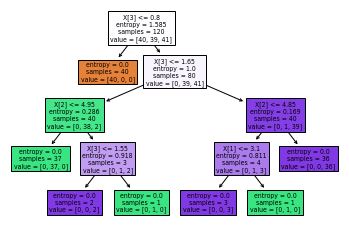

In [66]:
plot_tree(model_fit , filled=True)
plt.show()